# Import Libraries

In [11]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# MACD/EMA from TA
from ta.trend import MACD, EMAIndicator
# Boll from TA
from ta.volatility import BollingerBands

# Request Data from the past 12 months from YF

In [8]:
# History(): get historicals for one Stock
# stock = yf.Ticker('TSLA')
# stock_historical = Stock.history(
#     period="5mo", 
#     interval="1d",
# )

# Download(): get historicals for multiple Stocks
# In this case, I just need one for demo
stock_list = ['NVDA']
stock_historical = yf.download(
    stock_list, 
    period="12mo",
    interval="1d"
)

display(stock_historical.head())
print(len(stock_historical), "data points.")

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-06,205.240005,205.699997,202.100006,203.660004,203.521454,17849700
2021-08-09,204.460007,205.080002,201.429993,202.949997,202.811920,14644300
2021-08-10,203.220001,204.300003,198.350006,199.360001,199.224365,17923800
2021-08-11,200.429993,200.490005,194.300003,196.990005,196.856003,18592500
2021-08-12,198.699997,200.289993,196.199997,199.050003,198.914597,15165200


252 data points.


# Technical Analysis Library

## Short/Long/Signal Term Periods

In [47]:
ST_Period = 12
LT_Period = 26
SG_Period = 9

## EMA

In [85]:
# TA EMA generate the first EMA at index of window
EMA_ST = EMAIndicator(close=stock_historical.Close, window=ST_Period).ema_indicator()
EMA_LT = EMAIndicator(close=stock_historical.Close, window=LT_Period).ema_indicator()
EMA_SG = EMAIndicator(close=stock_historical.Close, window=SG_Period).ema_indicator()
stock_historical['EMA_ST']=EMA_ST
stock_historical['EMA_ST']=EMA_LT
stock_historical['EMA_ST']=EMA_SG

<AxesSubplot:xlabel='Date', ylabel='Close'>

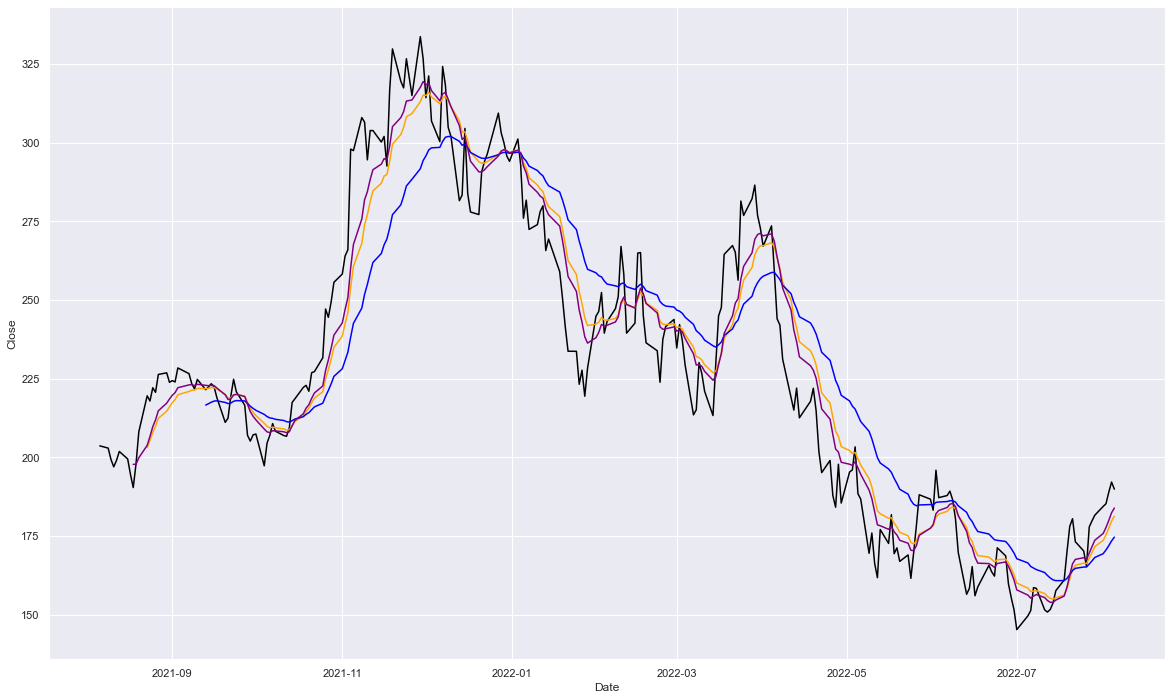

In [54]:
# Plot check
# Seaborn line plot: sns.lineplot(x='x_col_name',y='y_col_name',data=df)
sns.set(rc={'figure.figsize':(20,12)})
sns.lineplot(x=stock_historical.index,
             y=stock_historical.Close,
             data=stock_historical,
             color='black'
            )
sns.lineplot(x=stock_historical.index,
             y=EMA_ST,
             data=stock_historical,
             color='orange'
            )
sns.lineplot(x=stock_historical.index,
             y=EMA_LT,
             data=stock_historical,
             color='blue'
            )
sns.lineplot(x=stock_historical.index,
             y=EMA_SG,
             data=stock_historical,
             color='purple'
            )

## MACD & Signal Line (DIF & DEA) + Histogram (DIFF)

In [98]:
MACD_obj = MACD(close=stock_historical.Close, 
           window_fast=ST_Period, 
           window_slow=LT_Period,
           window_sign=SG_Period,
          )
DIF = MACD_obj.macd()
DEA = MACD_obj.macd_signal()
Histogram = MACD_obj.macd_diff()
stock_historical['DIF']=DIF
stock_historical['DEA']=DEA
stock_historical['Histogram']=Histogram.fillna(0)

<AxesSubplot:xlabel='Date', ylabel='MACD_diff_12_26'>

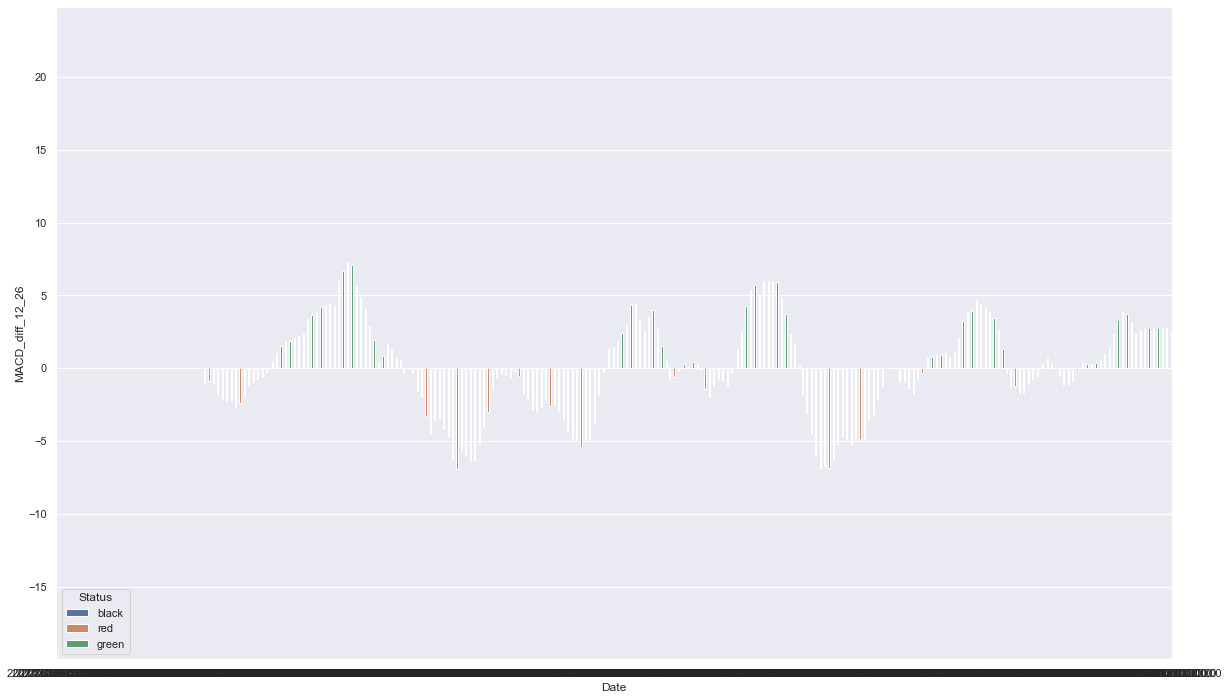

In [113]:
# Plot check
sns.lineplot(x=stock_historical.index,
             y=DIF,
             data=stock_historical,
             color='orange'
            )
sns.lineplot(x=stock_historical.index,
             y=DEA,
             data=stock_historical,
             color='blue'
            )
stock_historical['Status']='black'
stock_historical.loc[stock_historical['Histogram'] > 0,'Status'] = 'green'
stock_historical.loc[stock_historical['Histogram'] < 0,'Status'] = 'red'
sns.barplot(x=stock_historical.index,
            y=Histogram,
            hue=stock_historical.Status,
            data=stock_historical,
           )

In [114]:
stock_historical['Status']='black'
stock_historical.loc[stock_historical['Histogram'] > 0,'Status'] = 'green'
stock_historical.loc[stock_historical['Histogram'] < 0,'Status'] = 'red'
stock_historical.loc[stock_historical['Histogram'] < 0]

,Open,High,Low,Close,Adj Close,Volume,EMA_ST,DIF,DEA,Histogram,Status
Date,,,,,,,,,,,
2021-09-23,221.399994,225.350006,218.899994,224.820007,224.706696,24855500,219.837510,2.056455,3.097986,-1.041531,red
2021-09-24,220.699997,221.490005,218.610001,220.809998,220.698700,21765500,220.032008,1.977880,2.873965,-0.896085,red
2021-09-27,217.100006,217.990005,213.250000,216.600006,216.490829,24521500,219.345607,1.557938,2.610759,-1.052822,red
2021-09-28,212.139999,214.190002,206.509995,206.990005,206.885681,34306900,216.874487,0.444559,2.177519,-1.732960,red
2021-09-29,209.399994,210.169998,204.669998,205.169998,205.066574,21839400,214.533589,-0.577997,1.626416,-2.204413,red
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30,153.610001,155.669998,148.619995,151.589996,151.589996,68607000,161.017323,-6.858647,-6.348468,-0.510180,red
2022-07-01,148.990005,150.630005,143.919998,145.229996,145.229996,57761000,157.859857,-7.745761,-6.627926,-1.117835,red
2022-07-05,141.750000,149.710007,140.550003,149.639999,149.639999,65139700,156.215886,-8.000728,-6.902487,-1.098241,red


<AxesSubplot:xlabel='Date', ylabel='Histogram'>

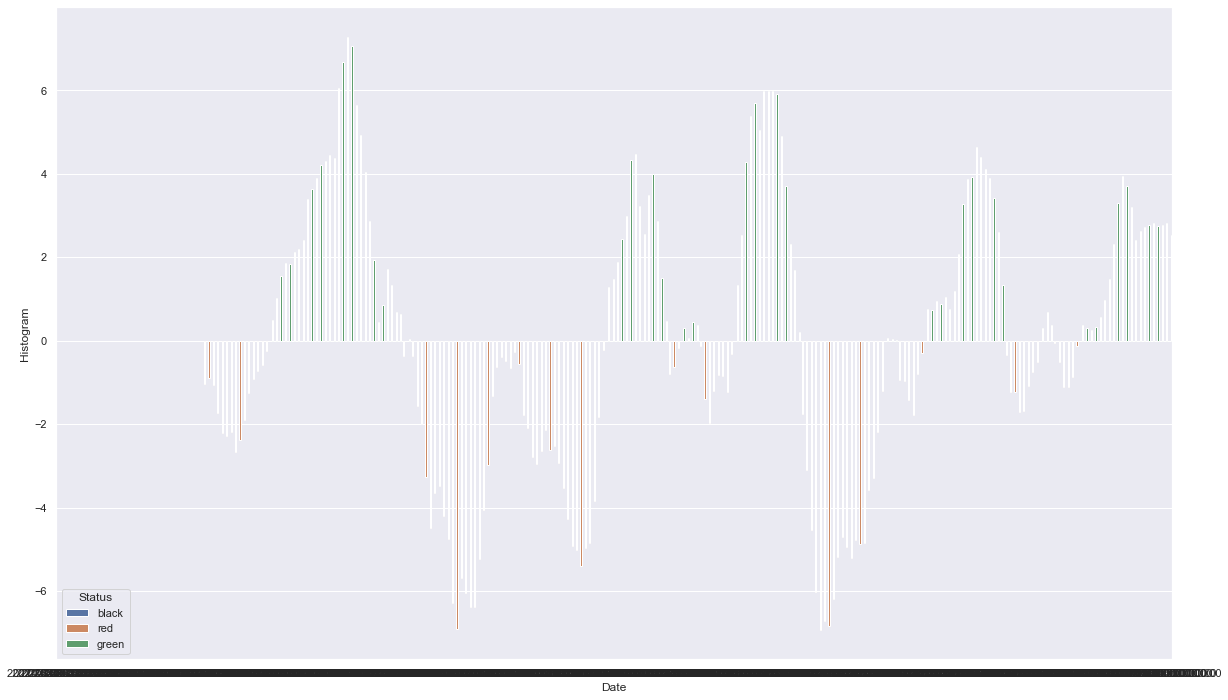

In [117]:
sns.barplot(x=stock_historical.index,
            y='Histogram',
            hue='Status',
            data=stock_historical,
           )

## BOLL